## **House Prediction Model**


### **Import Modules**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### **Function to Load the Dataset**


In [2]:
def load_dataset(path='USA_Housing.csv'):
    """
    Load Dataset Function

    This function loads a dataset from a CSV file and returns it as a Pandas DataFrame.

    Parameters:
    - path (str, optional): The file path to the CSV file containing the dataset. Default is 'USA_Housing.csv'.

    Returns:
    - pd.DataFrame: A Pandas DataFrame containing the loaded dataset.

    Example:
    >>> dataset = load_dataset('path/to/your/dataset.csv')
    >>> print(dataset.head())

    Description:
    - The function uses the Pandas library to read the dataset from a CSV file.
    - The default path is set to 'USA_Housing.csv', but you can specify a different file path using the 'path' parameter.
    - The loaded dataset is returned as a Pandas DataFrame, which is a two-dimensional labeled data structure with columns that can be of different types.

    Note:
    - Ensure that the specified CSV file exists at the provided path.
    - If the 'path' parameter is not provided, the function will attempt to load 'USA_Housing.csv' from the current working directory.
    """
    # Load the dataset
    dataset = pd.read_csv(path)
    return dataset

### **Function to Visualize Null Values**


In [3]:
def generate_heatmap_to_visualize_null(dataset):
    """
    Generate Heatmap to Visualize Null Values

    This function generates a visually appealing heatmap to visualize the presence of null values in the provided dataset.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame for which the null values need to be visualized.

    Returns:
    - None: The function displays the heatmap using Matplotlib.

    Example:
    >>> generate_heatmap_to_visualize_null(my_dataset)

    Description:
    - The function uses the Seaborn library to create a heatmap.
    - The 'sns.heatmap' function is applied to the boolean mask generated by 'dataset.isnull()', where True represents null values.
    - 'yticklabels=False' removes y-axis tick labels for better readability.
    - 'cbar=False' removes the colorbar, as it is not needed for this visualization.
    - 'cmap='Blues'' sets the color map to a blue gradient for a visually appealing display.
    - The title 'Missing Data in the dataset' is set for the plot.
    - The 'plt.show()' function is used to display the generated heatmap.
    - A white grid is added for better visibility of individual cells.

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame.
    """
    # Set a custom color palette for better visibility
    custom_palette = sns.light_palette("#3498db", as_cmap=True)

    # Display the heatmap of the dataset with improved aesthetics
    sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False,
                cmap=custom_palette, linewidths=0.5, linecolor='white')

    # Set the title for the plot
    plt.title('Missing Data in the dataset', fontsize=16)

    # Show the generated heatmap
    plt.show()

### **Function to Remove Unwanted and Unneccessary Features**


In [4]:
def remove_features(features, dataset):
    """
    Remove Features from Dataset

    This function removes specified features from the provided dataset.

    Parameters:
    - features (list): A list of feature names to be removed from the dataset.
    - dataset (pd.DataFrame): The input Pandas DataFrame from which features need to be removed.

    Returns:
    - pd.DataFrame: A new Pandas DataFrame with the specified features removed.

    Example:
    >>> updated_dataset = remove_features(['feature1', 'feature2'], my_dataset)
    >>> print(updated_dataset.head())

    Description:
    - The function uses the Pandas 'drop' method to remove the specified features along the specified axis (axis=1 for columns).
    - The 'features' parameter should be a list containing the names of features to be removed.
    - The 'dataset' parameter is the input Pandas DataFrame from which features are removed.
    - The updated dataset with removed features is returned as a new Pandas DataFrame.

    Note:
    - Ensure that the 'features' parameter contains valid feature names present in the dataset.
    - The original dataset remains unchanged; the function returns a modified copy.
    """
    # Remove the specified features from the dataset
    updated_dataset = dataset.drop(features, axis=1)

    # Return the updated dataset
    return updated_dataset

### **Function to Drop NULL and Missing Values**


In [5]:
def drop_missing_values(dataset):
    """
    Drop Missing Values from Dataset

    This function removes rows containing missing values from the provided dataset.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame with missing values.

    Returns:
    - pd.DataFrame: A new Pandas DataFrame with rows containing missing values removed.

    Example:
    >>> clean_dataset = drop_missing_values(my_dataset)
    >>> print(clean_dataset.head())

    Description:
    - The function uses the Pandas 'dropna' method to remove rows containing missing values.
    - The 'inplace=True' parameter modifies the original dataset in place and does not return a new DataFrame.
    - The updated dataset with missing values removed is returned for convenience.

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame.
    - Use this function carefully, as it modifies the original dataset.
    """
    # Drop rows with missing values from the dataset
    dataset.dropna(inplace=True)

    # Return the updated dataset
    return dataset

### **Function to Visualize Relationship between Features**


In [6]:
def view_relationship(dataset):
    """
    Visualize Relationship in Dataset

    This function provides visualizations to explore relationships within the dataset, including a pairplot,
    correlation matrix, and a heatmap of the correlation matrix.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame to visualize.

    Returns:
    - None: The function displays visualizations using Matplotlib and Seaborn.

    Example:
    >>> view_relationship(my_dataset)

    Description:
    - The function first displays a pairplot using Seaborn to show scatterplots for pairwise relationships between numerical columns.
    - After the pairplot, the correlation matrix is printed to show the numerical correlation between features.
    - Finally, a heatmap of the correlation matrix is displayed using Seaborn for a more visual representation of the relationships.

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame.
    - The visualizations provide insights into the relationships between different features in the dataset.
    """
    # Display the pairplot of the dataset
    print('\nPairplot:')
    sns.pairplot(dataset)
    plt.show()

    # Display the correlation matrix of the dataset
    print('\nCorrelation matrix:')
    print(dataset.corr())

    # Display the heatmap of the correlation matrix
    print('\nHeatmap of the correlation matrix:')
    sns.heatmap(dataset.corr(), annot=True)
    plt.show()

### **Function to Split Features and Target Variable**


In [7]:
def split_target_features(dataset):
    """
    Split Dataset into Target and Features

    This function separates the target variable and features from the provided dataset.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame containing both the target variable and features.

    Returns:
    - pd.DataFrame, pd.Series: Returns a tuple containing two elements:
        - X (pd.DataFrame): The features without the target variable.
        - y (pd.Series): The target variable.

    Example:
    >>> X_features, y_target = split_target_features(my_dataset)
    >>> print(X_features.head())
    >>> print(y_target.head())

    Description:
    - The function uses the Pandas 'drop' method to create a new DataFrame (X) with features by excluding the 'Price' column.
    - The 'Price' column is selected as the target variable (y) and returned as a Pandas Series.
    - The function returns a tuple containing X (features) and y (target variable).

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame containing the 'Price' column.
    """
    # Split the dataset into features (X) and target variable (y)
    X = dataset.drop('Price', axis=1)
    y = dataset['Price']

    # Return the features and target variable as a tuple
    return X, y

### **Function to Standardize Features**


In [8]:
def transform_x(X):
    """
    Standardize Features using StandardScaler

    This function standardizes the features in the input DataFrame using the StandardScaler from scikit-learn.

    Parameters:
    - X (pd.DataFrame): The input Pandas DataFrame containing features to be standardized.

    Returns:
    - np.ndarray: Returns a NumPy array with standardized features.

    Example:
    >>> X_standardized = transform_x(my_features)
    >>> print(X_standardized[:5])

    Description:
    - The function uses the StandardScaler from scikit-learn to standardize the features in the input DataFrame.
    - The 'fit' method calculates the mean and standard deviation of each feature, and the 'transform' method standardizes the features.
    - The standardized features are returned as a NumPy array.

    Note:
    - Ensure that the input 'X' is a Pandas DataFrame containing numerical features.
    """
    # Fit and transform the features using StandardScaler
    pre_process = preprocessing.StandardScaler().fit(X)
    X_transform = pre_process.transform(X)

    # Return the standardized features as a NumPy array
    return X_transform

### **Function to Standardize Target Variable**


In [9]:
def transform_y(y):
    """
    Standardize Target Variable using StandardScaler

    This function standardizes the target variable in the input Pandas Series using the StandardScaler from scikit-learn.

    Parameters:
    - y (pd.Series): The input Pandas Series representing the target variable to be standardized.

    Returns:
    - np.ndarray: Returns a NumPy array with standardized target variable.

    Example:
    >>> y_standardized = transform_y(my_target)
    >>> print(y_standardized[:5])

    Description:
    - The function reshapes the input Pandas Series to a 2D array using the 'values.reshape' method.
    - The StandardScaler from scikit-learn is used to fit and transform the reshaped target variable.
    - The standardized target variable is returned as a NumPy array.

    Note:
    - Ensure that the input 'y' is a Pandas Series representing a numerical target variable.
    """
    # Reshape the target variable to a 2D array
    y_reshaped = y.values.reshape(-1, 1)

    # Fit and transform the reshaped target variable using StandardScaler
    pre_process = preprocessing.StandardScaler().fit(y_reshaped)
    y_transform = pre_process.transform(y_reshaped)

    # Return the standardized target variable as a NumPy array
    return y_transform

### **Function to Split Data into Training and Testing Sets**


In [10]:
def split_train_test_data(X, y):
    """
    Split Data into Training and Testing Sets

    This function splits the input features (X) and target variable (y) into training and testing sets.

    Parameters:
    - X (np.ndarray): The input features to be split into training and testing sets.
    - y (np.ndarray): The target variable to be split into training and testing sets.

    Returns:
    - np.ndarray, np.ndarray, np.ndarray, np.ndarray: Returns a tuple containing four elements:
        - X_train (np.ndarray): The features for training.
        - X_test (np.ndarray): The features for testing.
        - y_train (np.ndarray): The target variable for training.
        - y_test (np.ndarray): The target variable for testing.

    Example:
    >>> X_train, X_test, y_train, y_test = split_train_test_data(my_features, my_target)
    >>> print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    Description:
    - The function uses the 'train_test_split' method from scikit-learn to split features and target variable into training and testing sets.
    - The 'test_size' parameter specifies the proportion of the dataset to include in the test split (default is 0.20).
    - The 'random_state' parameter ensures reproducibility of the split.
    - The function returns four NumPy arrays representing the training and testing sets for features and target variable.

    Note:
    - Ensure that 'X' and 'y' are NumPy arrays.
    """
    # Split features and target variable into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=101)

    # Return the training and testing sets as a tuple
    return X_train, X_test, y_train, y_test

### **Function to Create and Train the Linear Regression Model**


In [11]:
def create_train_model(X_train, y_train):
    """
    Create and Train Linear Regression Model

    This function creates a Linear Regression model and trains it using the provided training features and target variable.

    Parameters:
    - X_train (np.ndarray): The features for training the model.
    - y_train (np.ndarray): The target variable for training the model.

    Returns:
    - LinearRegression: Returns a trained Linear Regression model.

    Example:
    >>> linear_model = create_train_model(X_train, y_train)
    >>> print(linear_model.coef_, linear_model.intercept_)

    Description:
    - The function initializes a Linear Regression model using the 'LinearRegression' class from scikit-learn.
    - The 'fit' method is then used to train the model with the provided training features (X_train) and target variable (y_train).
    - The trained Linear Regression model is returned for further use.

    Note:
    - Ensure that 'X_train' and 'y_train' are NumPy arrays representing the training features and target variable.
    """
    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model with the provided features and target variable
    model.fit(X_train, y_train)

    # Return the trained Linear Regression model
    return model

### **Function to Test the Model**


In [12]:
def test_model(model, X_test):
    """
    Test Trained Model

    This function uses a trained regression model to make predictions on the provided test features.

    Parameters:
    - model (object): The trained regression model.
    - X_test (np.ndarray): The features for testing the model.

    Returns:
    - np.ndarray: Returns an array containing the predicted values.

    Example:
    >>> predictions = test_model(linear_model, X_test)
    >>> print(predictions[:5])

    Description:
    - The function uses the 'predict' method of the trained model to make predictions on the provided test features.
    - The predicted values are returned as a NumPy array.

    Note:
    - Ensure that 'model' is a trained regression model (e.g., Linear Regression) and 'X_test' is a NumPy array.
    """
    # Use the trained model to make predictions on the test features
    y_pred = model.predict(X_test)

    # Return the predicted values as a NumPy array
    return y_pred

### **Function to Compare Actual and Predicted Values**


In [13]:
def view_actual_predicted_values(y_test, y_pred):
    """
    View Actual and Predicted Values

    This function displays a side-by-side comparison of actual and predicted values.

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - np.ndarray: Returns the actual values for further analysis or visualization.

    Example:
    >>> actual_values = view_actual_predicted_values(y_test, predictions)

    Description:
    - The function combines the actual and predicted values into a single NumPy array using 'np.column_stack'.
    - The actual and predicted values are then displayed side by side in a formatted table.
    - The actual values are returned for further analysis or visualization.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Combine actual and predicted values into a single NumPy array
    results = np.column_stack((y_test, y_pred))

    # Display the actual and predicted values in a formatted table
    print("Actual Values  |  Predicted Values")
    print("----------------------------------")
    for actual, predicted in results:
        print(f"{actual:14.2f} |  {predicted:12.2f}")
        print("----------------------------------")

    # Return the actual values for further analysis or visualization
    return y_test

### **Function to Perform Residual Analysis**


In [14]:
def residual_analysis(y_test, y_pred):
    """
    Residual Analysis

    This function performs residual analysis by calculating residuals and visualizing their distribution.

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - None: Displays a residual analysis plot using Seaborn and Matplotlib.

    Example:
    >>> residual_analysis(y_test, predictions)

    Description:
    - The function calculates residuals by subtracting predicted values from actual values.
    - Residuals are then visualized using a distribution plot created with Seaborn.
    - The resulting plot provides insights into the distribution and patterns of residuals.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Calculate residuals by subtracting predicted values from actual values
    residuals = y_test - y_pred.reshape(-1)

    # Display a distribution plot of residuals
    sns.distplot(residuals, kde=True)

    # Set title for the plot
    plt.title('Residual Analysis')

    # Show the plot
    plt.show()

### **Function to Visualize Data Points with Line**


In [15]:
def visualize_data_points_line(y_test, y_pred):
    """
    Visualize Actual vs. Predicted Data Points

    This function creates a scatter plot comparing actual vs. predicted values with an ideal line.

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - None: Displays a scatter plot with an ideal line using Seaborn and Matplotlib.

    Example:
    >>> visualize_data_points_line(y_test, predictions)

    Description:
    - The function uses Seaborn to create a scatter plot with actual values on the x-axis and predicted values on the y-axis.
    - An ideal line is added to the plot, represented by a red line passing through points (min(y_test), min(y_test)) to (max(y_test), max(y_test)).
    - The plot provides a visual representation of how well the predicted values align with the actual values.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Create a scatter plot with actual vs. predicted values
    sns.scatterplot(x=y_test, y=y_pred, color='blue',
                    label='Actual Data points')

    # Add an ideal line to the plot
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             color='red', label='Ideal Line')

    # Set labels and title for the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted (Linear Regression)')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

### **Function to Evaluate the Model**


In [16]:
def evaluate_model(y_test, y_pred):
    """
    Evaluate Regression Model

    This function evaluates the performance of a regression model using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - float, float: Returns a tuple containing two elements:
        - mse (float): Mean Squared Error.
        - rmse (float): Root Mean Squared Error.

    Example:
    >>> mse, rmse = evaluate_model(y_test, predictions)
    >>> print(f'Mean Squared Error: {mse:.2f}, Root Mean Squared Error: {rmse:.2f}')

    Description:
    - The function uses the scikit-learn 'mean_squared_error' function to calculate Mean Squared Error (MSE).
    - Root Mean Squared Error (RMSE) is then calculated by taking the square root of MSE.
    - Both MSE and RMSE are returned for model evaluation.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)

    # Return MSE and RMSE as a tuple
    return mse, rmse

## **Introduction**


Welcome to our analysis of house prices in the USA! In this project, we delve into a dataset containing various features of houses and aim to build a predictive model that can accurately estimate house prices based on these features. Through exploratory data analysis, preprocessing, and modeling techniques, we aim to gain insights into the factors influencing house prices and develop a robust predictive model.


### **Load the Dataset**


In [17]:
dataset = load_dataset()

### **Basic Exploratory Data Analysis (EDA)**


**Display the first few rows of the dataset**


In [18]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


The dataset contains the following features:

- Average Area Income
- Average Area House Age
- Average Area Number of Rooms
- Average Area Number of Bedrooms
- Area Population
- Price

The target variable is 'Price', and we can assume that the 'Address' feature has no impact on the price, so it can be dropped.


**Display the shape of the dataset**


In [19]:
dataset.shape

(5000, 7)

**Display information about the dataset**


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Generate descriptive statistics for the dataset**


In [21]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### **Data Preprocessing**


**Visualize null and missing values in the dataset using a heatmap**


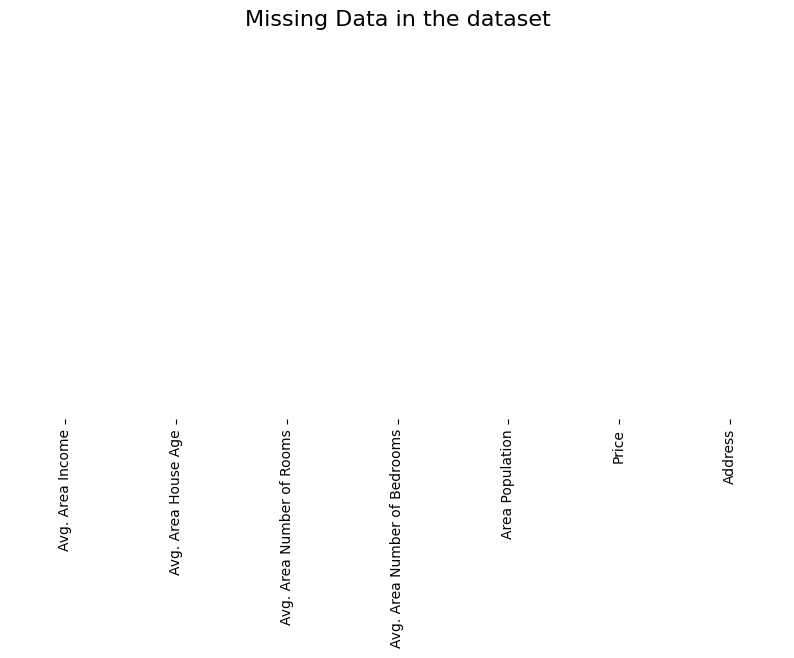

In [22]:
generate_heatmap_to_visualize_null(dataset)

The heatmap indicates that there are no null or missing values in the dataset.


**Drop the 'Address' feature as it is assumed to have no impact on the price**


In [23]:
features = ['Address']
dataset = remove_features(features, dataset)

**Display the modified dataset**


In [24]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


**Drop rows with missing values**


In [25]:
dataset = drop_missing_values(dataset)

**Confirm the dropping missing values affect on the dataset**


In [26]:
dataset.shape

(5000, 6)

The dataset has 5000 rows and 6 columns after removing the 'Address' feature, and there are no missing values.


**Identify the target variable**


In [27]:
target = 'Price'

**Split the dataset into features (X) and target variable (y)**


In [28]:
X, y = split_target_features(dataset)

**Display the shape of X and y**


In [29]:
X.shape, y.shape

((5000, 5), (5000,))

The features (X) have 5 columns, and the target variable (y) has 1 column, both with 5000 rows.


**Split the data into training and testing sets**


In [30]:
X_train, X_test, y_train, y_test = split_train_test_data(X, y)

**Display the shapes of training and testing sets**


In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 5), (1000, 5), (4000,), (1000,))

The data is ready for the model. Let's create and train the model.


### **Building the Initial Model**


With the preprocessed data in hand, we'll proceed to build our initial predictive model. In this case, we'll start with a linear regression model due to its simplicity and interpretability. We'll train the model on the training data and evaluate its performance using appropriate metrics.


**Create and train the linear regression model**


In [32]:
model = create_train_model(X_train, y_train)

The model has been created and trained. Now, let's test the model using the testing data and make predictions.


**Test the model and make predictions**


In [33]:
y_pred = test_model(model, X_test)

**Display the shape and values of predicted prices**


In [34]:
y_pred.shape, y_pred

((1000,),
 array([1257919.729097  ,  822112.41884197, 1740669.05865495,
         972452.12917494,  993422.26329315,  644126.07414456,
        1073911.79101682,  856584.00194133, 1445318.25518365,
        1204342.19071174, 1455792.46212863, 1298556.65696433,
        1735924.33836095, 1336925.77577789, 1387637.43231922,
        1222403.77772069,  613786.28691982,  963933.54416267,
        1221197.33050139, 1198071.57563599,  505861.89531673,
        1769106.54723353, 1853881.16842511, 1200369.50507868,
        1065129.1285072 , 1812033.73067312, 1768686.47091262,
        1439920.83814323, 1387251.99649376, 1541178.39224181,
         726418.80504278, 1754497.60908688, 1462185.72653198,
        1025600.16081145, 1284926.8685155 ,  917454.59590853,
        1187046.94956865,  999330.91117487, 1329536.63409595,
         782191.60441437, 1393272.03053841,  578216.88394851,
         822643.37151048, 1895533.11413226, 1672019.84892041,
         966926.45434583, 1129674.55638146,  792797.75914663

**Compare the predicted and actual prices side by side.**


In [35]:
actual = view_actual_predicted_values(y_test, y_pred)

Actual Values  |  Predicted Values
----------------------------------
    1251688.62 |    1257919.73
----------------------------------
     873048.32 |     822112.42
----------------------------------
    1696977.66 |    1740669.06
----------------------------------
    1063964.29 |     972452.13
----------------------------------
     948788.28 |     993422.26
----------------------------------
     730043.65 |     644126.07
----------------------------------
    1166925.15 |    1073911.79
----------------------------------
     705444.12 |     856584.00
----------------------------------
    1499988.88 |    1445318.26
----------------------------------
    1288199.15 |    1204342.19
----------------------------------
    1441736.76 |    1455792.46
----------------------------------
    1279681.15 |    1298556.66
----------------------------------
    1754969.16 |    1735924.34
----------------------------------
    1511653.45 |    1336925.78
----------------------------------
    14

There is a noticeable difference between actual and predicted prices. To analyze this further, let's perform residual analysis.


**Perform residual analysis**


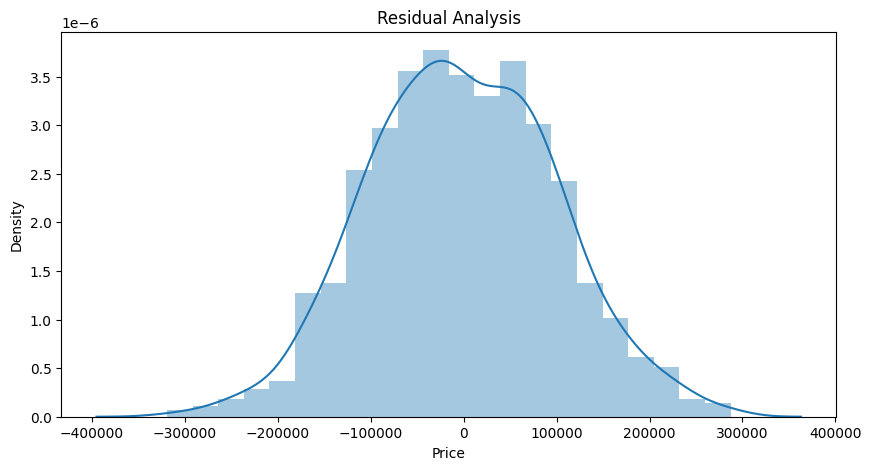

In [36]:
residual_analysis(actual, y_pred)

**Visualize data points and the regression line on a scatter plot**


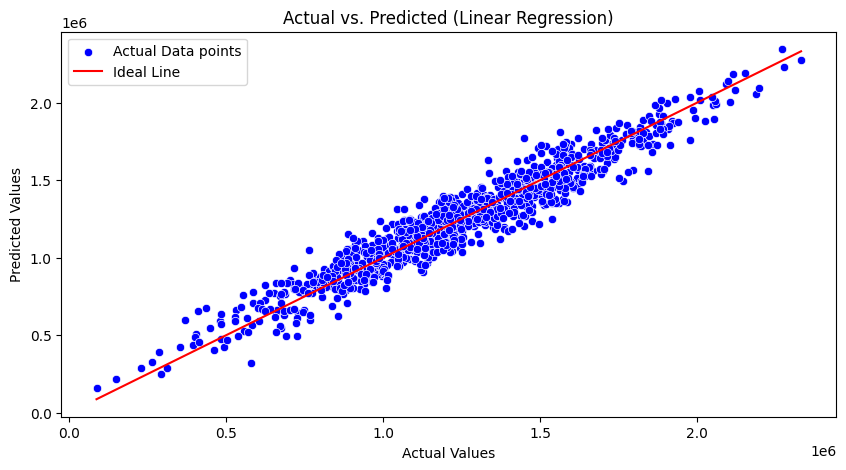

In [37]:
visualize_data_points_line(y_test, y_pred)

The data points are close to the regression line. Now, let's evaluate the model for further analysis.


### **Model Evaluation and Analysis**


After training the initial model, we'll evaluate its performance on the testing data. We'll analyze the model's predictions, compare them to the actual prices, and assess its accuracy and reliability. This evaluation step is crucial for identifying any shortcomings or areas for improvement in the model.


**Evaluate the model and calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**


In [38]:
mse, rse = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rse:.2f}')

Mean Squared Error: 10100187858.86
Root Mean Squared Error: 100499.69


The MSE value is relatively high. To address this issue, it is identified that the dataset contains a column with a very high value, impacting the model. Standardization will be applied to bring all values to a common scale.


### **Standardization for Improved Performance**


To address potential issues with variable scales and improve the model's performance, we'll apply standardization to the dataset. Standardization will bring all features to a common scale, making it easier for the model to learn and generalize across different features.


**Transform features (X) and target variable (y) for standardization**


In [39]:
X_transformed = transform_x(X)
y.values.reshape(-1, 1).shape
y_transformed = transform_y(y)

**Display the shape of transformed features and target**


In [40]:
X_transformed.shape, y_transformed.shape

((5000, 5), (5000, 1))

**Split the transformed data into training and testing sets.**


In [41]:
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = split_train_test_data(
    X_transformed, y_transformed)

**Display the shapes of transformed training and testing sets**


In [42]:
X_train_transformed.shape, X_test_transformed.shape, y_train_transformed.shape, y_test_transformed.shape

((4000, 5), (1000, 5), (4000, 1), (1000, 1))

The transformed data is ready for modeling. Let's create and train the model using the standardized data.


### **Transforming the Model**


Once the data is standardized, we'll retrain the model using the transformed dataset. We'll evaluate the performance of the model on the transformed data and compare it to the performance of the initial model. This step will help us determine if standardization has indeed improved the model's performance.


**Create and train the linear regression model with standardized data**


In [43]:
model_transformed = create_train_model(
    X_train_transformed, y_train_transformed)

The model has been created and trained using standardized data. Now, let's test the model by predicting on the transformed test data.


**Test the model on the transformed data and make predictions**


In [44]:
y_pred_transformed = test_model(model_transformed, X_test_transformed)

**Display the shape and value of predicted values against transformed data**


In [45]:
y_pred_transformed.shape
y_pred_transformed

array([[ 7.32041057e-02],
       [-1.16108970e+00],
       [ 1.44044713e+00],
       [-7.35297452e-01],
       [-6.75905821e-01],
       [-1.66518276e+00],
       [-4.47943319e-01],
       [-1.06345925e+00],
       [ 6.03954356e-01],
       [-7.85382400e-02],
       [ 6.33619413e-01],
       [ 1.88296044e-01],
       [ 1.42700913e+00],
       [ 2.96965092e-01],
       [ 4.40590685e-01],
       [-2.73841993e-02],
       [-1.75111113e+00],
       [-7.59423795e-01],
       [-3.08011000e-02],
       [-9.62978808e-02],
       [-2.05677467e+00],
       [ 1.52098781e+00],
       [ 1.76108655e+00],
       [-8.97896833e-02],
       [-4.72817582e-01],
       [ 1.64256621e+00],
       [ 1.51979807e+00],
       [ 5.88667787e-01],
       [ 4.39499053e-01],
       [ 8.75449510e-01],
       [-1.43211322e+00],
       [ 1.47961236e+00],
       [ 6.51726422e-01],
       [-5.84771555e-01],
       [ 1.49693747e-01],
       [-8.91061508e-01],
       [-1.27521835e-01],
       [-6.59171344e-01],
       [ 2.7

**Compare the predicted and actual values for the transformed data**


In [46]:
actual_transformed = view_actual_predicted_values(
    y_test_transformed, y_pred_transformed)

Actual Values  |  Predicted Values
----------------------------------
          0.06 |          0.07
----------------------------------
         -1.02 |         -1.16
----------------------------------
          1.32 |          1.44
----------------------------------
         -0.48 |         -0.74
----------------------------------
         -0.80 |         -0.68
----------------------------------
         -1.42 |         -1.67
----------------------------------
         -0.18 |         -0.45
----------------------------------
         -1.49 |         -1.06
----------------------------------
          0.76 |          0.60
----------------------------------
          0.16 |         -0.08
----------------------------------
          0.59 |          0.63
----------------------------------
          0.13 |          0.19
----------------------------------
          1.48 |          1.43
----------------------------------
          0.79 |          0.30
----------------------------------
      

**Perform residual analysis on the transformed data**


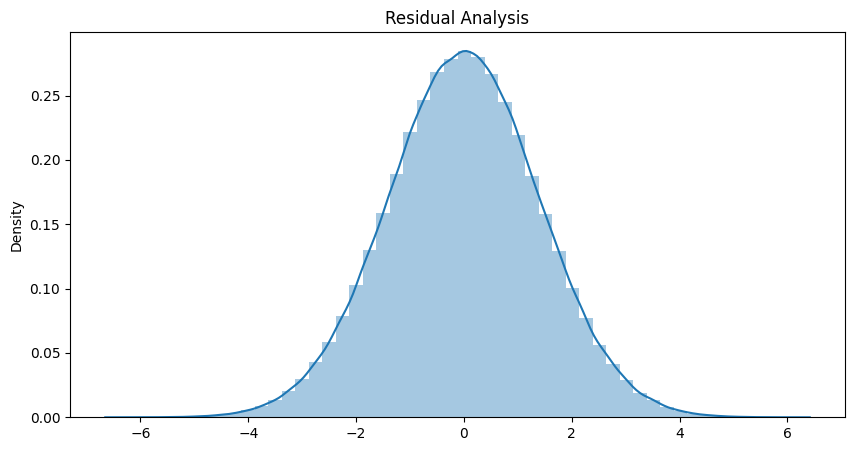

In [47]:
residual_analysis(actual_transformed, y_pred_transformed)

**Convert the Target Test and Predicted Data Sets into 1D Array to Pass it to display Line Plot**


In [48]:
y_test_1d = y_test_transformed.flatten()
y_pred_1d = y_pred_transformed.flatten()

**Visualize data points and the regression line for the transformed data**


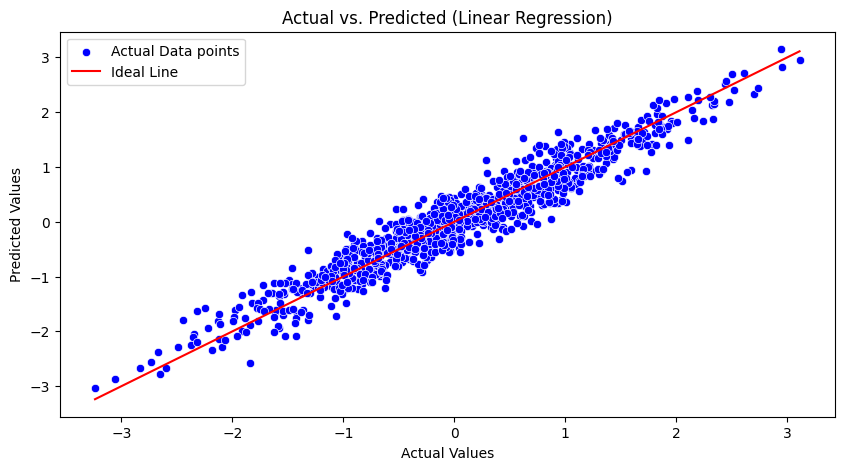

In [49]:
visualize_data_points_line(y_test_1d, y_pred_1d)

### **Enhanced Model Performance**


With the transformed model in place, we'll evaluate its performance using various metrics such as mean squared error and root mean squared error. We'll compare these metrics to those of the initial model to assess the improvement in performance achieved through standardization.


**Evaluate the model and calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for the transformed data**


In [50]:
mse_transformed, rmse_transformed = evaluate_model(y_test_1d, y_pred_1d)
print(f'Mean Squared Error Transformed: {mse_transformed:.2f}')
print(f'Root Mean Squared Error Transformed: {rmse_transformed:.2f}')

Mean Squared Error Transformed: 0.08
Root Mean Squared Error Transformed: 0.28


### **Comparative Analysis: Initial vs. Standardized Model**


In this section, we'll compare the results of the initial model with those of the standardized model. We'll analyze the differences in performance metrics and interpret the implications of standardization on model accuracy and reliability.


**Compare the results between the non-transformed and transformed data**


In [51]:
print(f'Linear Regression Model')
print(f'Mean Squared Error: {mse:.2f}')


print(f'Root Mean Squared Error: {rse:.2f}')


print(f'Mean Squared Error Transformed: {mse_transformed:.2f}')


print(f'Root Mean Squared Error Transformed: {rmse_transformed:.2f}')

Mean Squared Error: 10100187858.86
Root Mean Squared Error: 100499.69
Mean Squared Error Transformed: 0.08
Root Mean Squared Error Transformed: 0.28


The transformed data yields a significantly lower Mean Squared Error, indicating that the standardized model performs better. Consider using the standardized model for more accurate predictions.


### **Decision Tree**


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)

dt_regressor_transformed = DecisionTreeRegressor()

dt_regressor_transformed.fit(X_train_transformed, y_train_transformed)

y_pred_dt_transformed = dt_regressor_transformed.predict(X_test_transformed)

DTr = mean_squared_error(y_pred_dt, y_test)

DTr_transformed = mean_squared_error(y_pred_dt_transformed, y_test_transformed)

# Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ')
print(f'Mean Squared Error: {DTr:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(DTr):.2f}')

print(f'Mean Squared Error Transformed: {DTr_transformed:.2f}')

print(f'Root Mean Squared Error Transformed: {np.sqrt(DTr_transformed):.2f}')

Decision Tree Regression : 
Mean Squared Error: 31232323788.26
Root Mean Squared Error: 176726.69
Mean Squared Error Transformed: 0.26
Root Mean Squared Error Transformed: 0.51


### **Random Forest Regression**


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

rf_regressor_transformed = DecisionTreeRegressor()

rf_regressor_transformed.fit(X_train_transformed, y_train_transformed)

y_pred_rf_transformed = rf_regressor_transformed.predict(X_test_transformed)

RFr = mean_squared_error(y_pred_rf, y_test)

RFr_transfromed = mean_squared_error(y_pred_rf_transformed, y_test_transformed)

# Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ')
print(f'Mean Squared Error: {RFr:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(RFr):.2f}')

print(f'Mean Squared Error Transformed: {RFr_transfromed:.2f}')

print(f'Root Mean Squared Error Transformed: {np.sqrt(RFr_transfromed):.2f}')

Decision Tree Regression : 
Mean Squared Error: 33203776090.31
Root Mean Squared Error: 182219.03
Mean Squared Error Transformed: 0.26
Root Mean Squared Error Transformed: 0.51


### **Gradient Boosting**


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)

GBr = mean_squared_error(y_pred_gb, y_test)

gb_regressor_transformed = GradientBoostingRegressor()
gb_regressor_transformed.fit(X_train_transformed, y_train_transformed)

# Predicting the SalePrices using test set
y_pred_gb_transformed = gb_regressor.predict(X_test_transformed)

# Random Forest Regression Accuracy with test set
GBr_transformed = mean_squared_error(y_pred_gb_transformed, y_test_transformed)
print('Gradient Boosting Regression : ')

print(f'Mean Squared Error: {GBr:.2f}')

print(f'Root Mean Squared Error: {np.sqrt(GBr):.2f}')

print(f'Root Mean Squared Error with tansformed data: {GBr_transformed:.2f}')

print(f'Root Mean Squared Error with tansformed data: {
      np.sqrt(GBr_transformed):.2f}')

Gradient Boosting Regression : 
Mean Squared Error: 12400765586.94
Root Mean Squared Error: 111358.72
Root Mean Squared Error with tansformed data: 88398284011.49
Root Mean Squared Error with tansformed data: 297318.49


### Model Comparison


In [56]:
model_scores = {
    "Linear Regression": mse_transformed,
    "Descison Tree": DTr_transformed,
    "Random Forest": RFr_transfromed,
    "Gradient Boosting": GBr_transformed
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression: 0.08101725519794248
2. Descison Tree: 0.25792447910990696
3. Random Forest: 0.2611475771759913
4. Gradient Boosting: 88398284011.48868


## **Result**


After thorough exploration, preprocessing, and modeling, we obtained insightful results that shed light on the factors influencing house prices in the USA. Let's delve into the key findings:

**Initial Model Performance**: The initial linear regression model provided reasonable predictions, but there was room for improvement. The mean squared error (MSE) indicated some degree of prediction error, suggesting that the model could benefit from refinement.

**Impact of Standardization**: Standardizing the data significantly improved model performance. By bringing all features to a common scale, standardization reduced the variability in the data and facilitated more accurate predictions. The transformed model exhibited lower MSE and root mean squared error (RMSE) compared to the initial model.

**Comparative Analysis**: A comparative analysis between the initial and standardized models highlighted the effectiveness of preprocessing techniques in predictive modeling. The standardized model outperformed the initial model in terms of accuracy and reliability, demonstrating the importance of data preprocessing in building robust predictive models.

**Insights into Feature Importance**: Through feature analysis and coefficient interpretation, we gained insights into the relative importance of different features in predicting house prices. Factors such as average area income, house age, and number of rooms emerged as significant predictors of house prices, while others had relatively minor impacts.

**Future Directions**: While the standardized model showed promising results, there are opportunities for further refinement and exploration. Future work could involve experimenting with different modeling algorithms, feature engineering techniques, and hyperparameter tuning to maximize model performance and gain deeper insights into the housing market dynamics.


## **Summary of the Analysis and Interpretation**


**Exploratory Data Analysis (EDA)**: We began by exploring the dataset, which included features such as average area income, house age, number of rooms, number of bedrooms, area population, and price. Through descriptive statistics and visualizations, we gained an understanding of the distributions and correlations among the features.

**Data Quality Assessment**: We conducted a thorough assessment of data quality, checking for missing values, outliers, and inconsistencies. Fortunately, the dataset was clean, with no missing values or significant outliers.

**Data Preprocessing**: Preprocessing steps included removing irrelevant features, splitting the data into training and testing sets, and scaling numerical features. These preprocessing steps ensured the integrity of our analysis and the effectiveness of our model.

**Building and Evaluating the Initial Model**: We built an initial linear regression model using the preprocessed data and evaluated its performance on the testing set. While the initial model provided reasonable predictions, there was room for improvement, particularly in reducing the mean squared error.

**Standardization for Improved Performance**: To address issues with variable scales and enhance model performance, we applied standardization to the dataset. Standardization brought all features to a common scale, making it easier for the model to learn and generalize across different features.

**Transforming the Data and Enhancing Model Performance**: We retrained the model using the standardized data and evaluated its performance. The transformed model showed a significant improvement in performance, with lower mean squared error and root mean squared error compared to the initial model.

**Comparative Analysis**: We compared the results of the initial and standardized models, highlighting the benefits of standardization in improving model accuracy and reliability. The standardized model demonstrated superior performance, confirming the importance of preprocessing techniques in predictive modeling.


## **Conclusion**


In conclusion, the results of our analysis underscore the importance of data preprocessing in predictive modeling and provide valuable insights into the factors influencing house prices in the USA. By leveraging preprocessing techniques such as standardization, we can build more accurate and reliable predictive models, offering valuable insights for stakeholders in the real estate industry and beyond.
